In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el dataset
data = pd.read_csv('ds_salaries.csv')

In [6]:
data.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2309,2022,MI,FT,Data Engineer,65000,USD,65000,US,0,US,M
961,2023,SE,FT,Data Engineer,130000,USD,130000,US,100,US,M
3147,2022,SE,FT,Data Scientist,148800,USD,148800,US,0,US,M
3680,2021,MI,FT,Machine Learning Engineer,180000,PLN,46597,PL,100,PL,L
2646,2022,MI,FT,Data Manager,134000,USD,134000,US,0,US,M


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


### Las correlaciones solo se pueden calcular entre variables numericas

In [10]:
# Matriz de correlación
correlation_matrix = data.corr(numeric_only = True)

In [11]:
correlation_matrix

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.094724,0.228290,-0.236430
salary,-0.094724,1.000000,-0.023676,0.028731
salary_in_usd,0.228290,-0.023676,1.000000,-0.064171
remote_ratio,-0.236430,0.028731,-0.064171,1.000000


## Analisis de la distribucion tanto numericas como categoricas
### Para las numericas histogramas y para las categoricas frecuencia de cada categoria

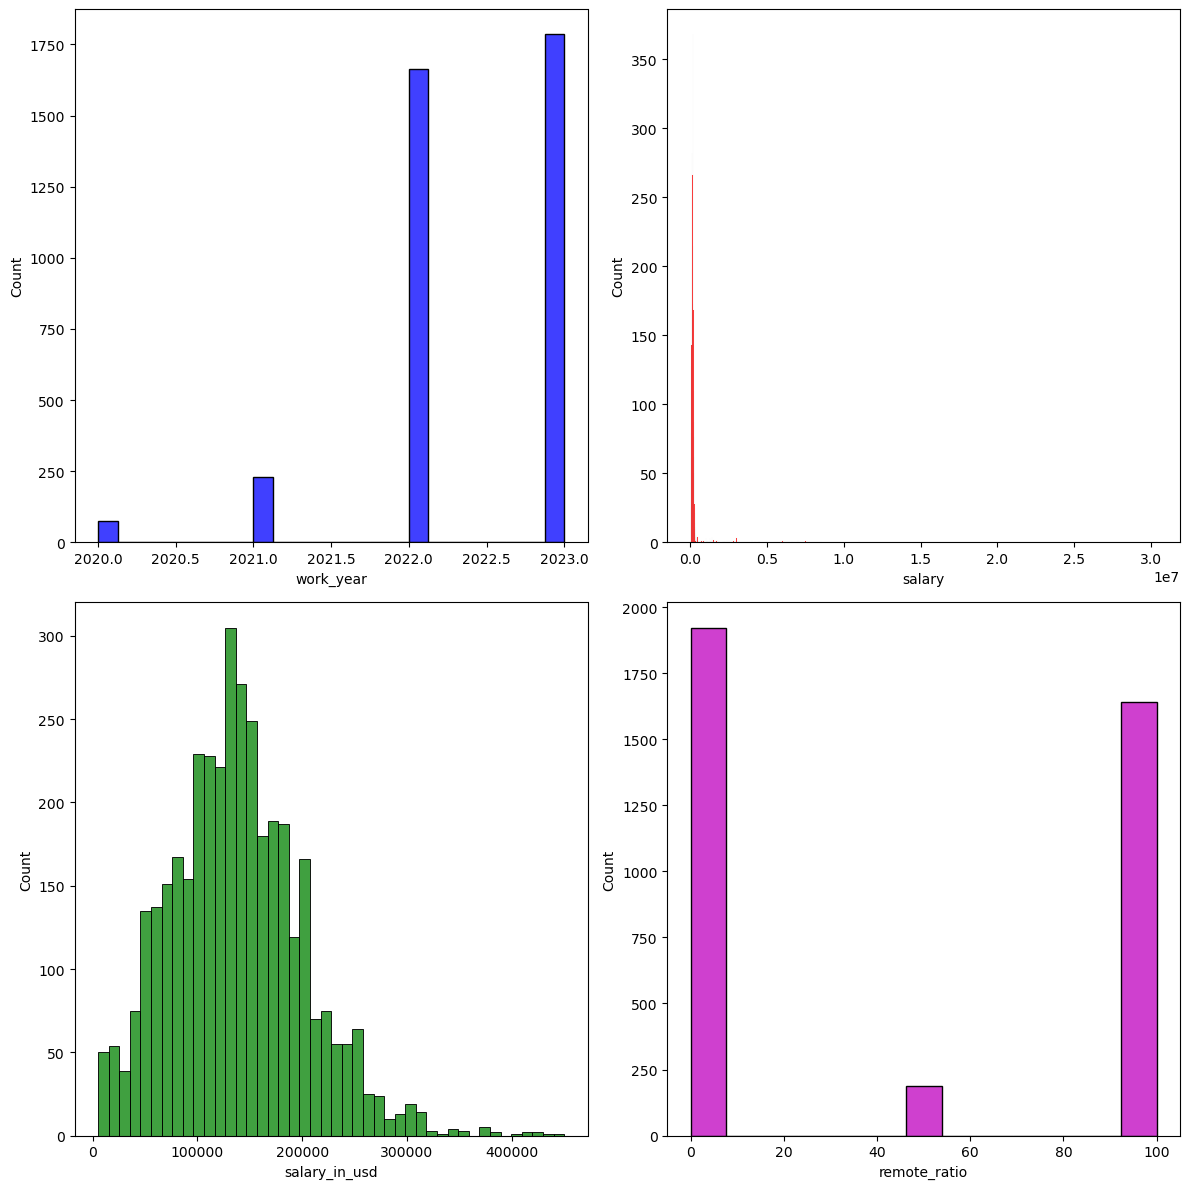

In [35]:
# Visualización de las distribuciones
f, axes = plt.subplots(2, 2, figsize = (12, 12))

# Crear histogramas de distribución de variables
sns.histplot(data = data, x = 'work_year', color = "b", ax = axes[0, 0])
sns.histplot(data = data, x = 'salary', color = "r", ax = axes[0, 1])
sns.histplot(data = data, x = 'salary_in_usd', color = "g", ax = axes[1, 0])
sns.histplot(data = data, x = 'remote_ratio', color = "m", ax = axes[1, 1])

plt.tight_layout()

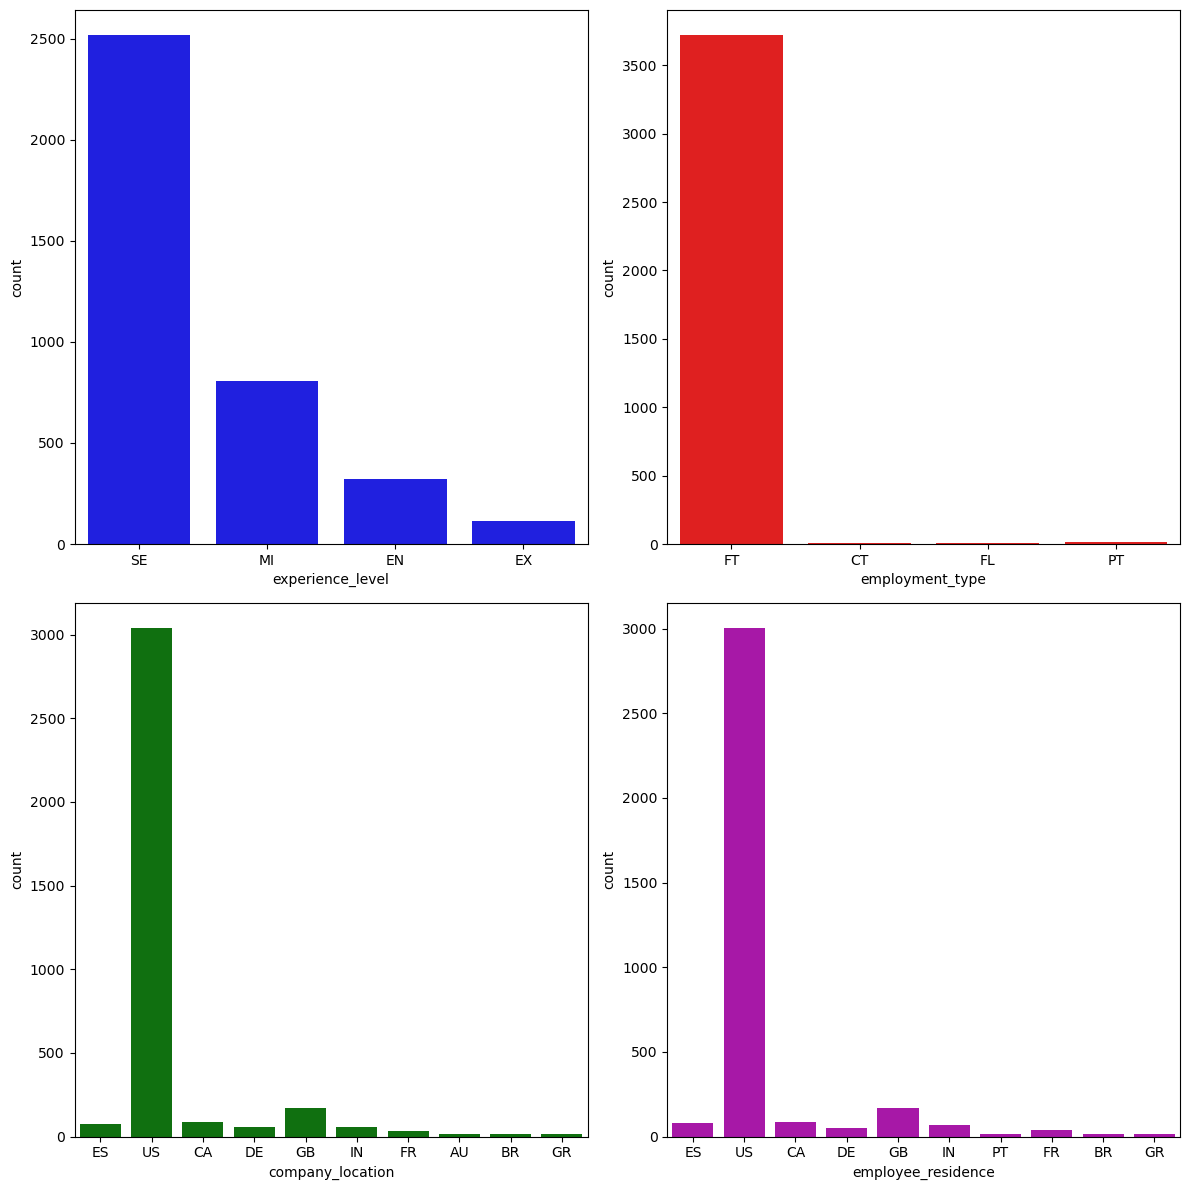

In [45]:
# Visualización de las distribuciones
f, axes = plt.subplots(2, 2, figsize = (12, 12))

sns.countplot(data = data, x = 'experience_level', color = "b", ax = axes[0, 0])
sns.countplot(data = data, x = 'employment_type', color = "r", ax = axes[0, 1])

# Al encontrar muchas labels filtramos por las 10 más frecuentes
top_locations = data['company_location'].value_counts().nlargest(10).index
top_residence = data['employee_residence'].value_counts().nlargest(10).index

sns.countplot(data = data[data['company_location'].isin(top_locations)], x = 'company_location', color = "g", ax = axes[1, 0])

sns.countplot(data = data[data['employee_residence'].isin(top_residence)], x = 'employee_residence', color = "m", ax = axes [1, 1])

plt.tight_layout()

## Ejercicio 2

In [16]:
# Leer datos
new_data = pd.read_csv('netflix_titles.csv')

In [19]:
new_data.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5378,s5379,Movie,D.L. Hughley: Clear,Jay Chapman,D.L. Hughley,United States,"July 13, 2017",2014,TV-MA,59 min,Stand-Up Comedy,In this 2014 standup special filmed in San Fra...
5723,s5724,TV Show,Danger Mouse,NaN,"Alexander Armstrong, Kevin Eldon, Stephen Fry,...",United Kingdom,"November 9, 2016",2016,TV-Y7,2 Seasons,"British TV Shows, Kids' TV",The world's greatest super-spy returns to save...
5693,s5694,Movie,For the Love of Spock,Adam Nimoy,"Leonard Nimoy, William Shatner, George Takei, ...","Canada, United States","December 2, 2016",2016,TV-14,112 min,Documentaries,The son of actor Leonard Nimoy directs this mo...
2246,s2247,TV Show,Down to Earth with Zac Efron,NaN,"Zac Efron, Darin Olien",United States,"July 10, 2020",2020,TV-PG,1 Season,"Docuseries, Reality TV, Science & Nature TV",Actor Zac Efron journeys around the world with...
3966,s3967,Movie,The Highwaymen,John Lee Hancock,"Kevin Costner, Woody Harrelson, Kathy Bates, J...",United States,"March 29, 2019",2019,R,132 min,Dramas,Two steely former Texas Rangers are tasked wit...


### Analizar la distibucion de la variable año (variable numérica)

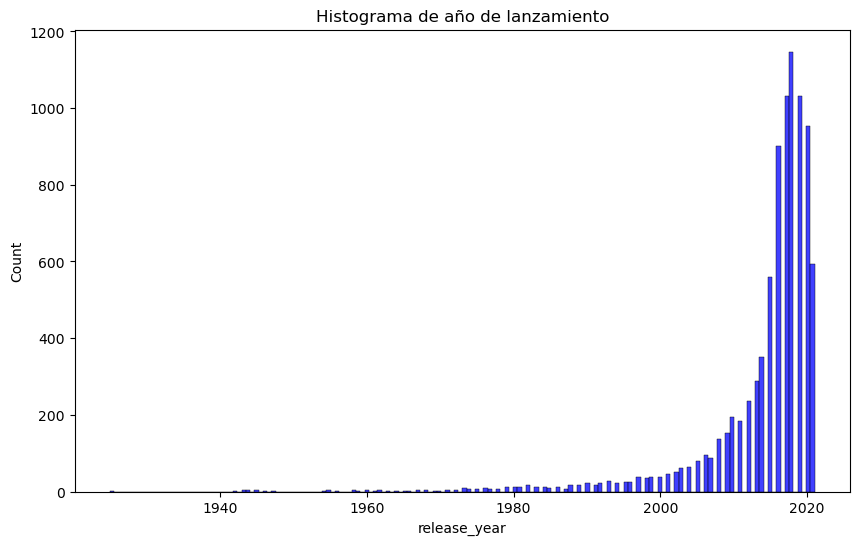

In [21]:
plt.figure(figsize = (10, 6))
sns.histplot(data = new_data, x = 'release_year', color = "b")
plt.title('Histograma de año de lanzamiento')
plt.show()

### Analizar la distibucion de las variables categoricas

In [28]:
# Pasar fechas a formato correspondiente
new_data['date_added'] = pd.to_datetime(new_data['date_added'], format = 'mixed')
new_data['year_added'] = new_data['date_added'].dt.year

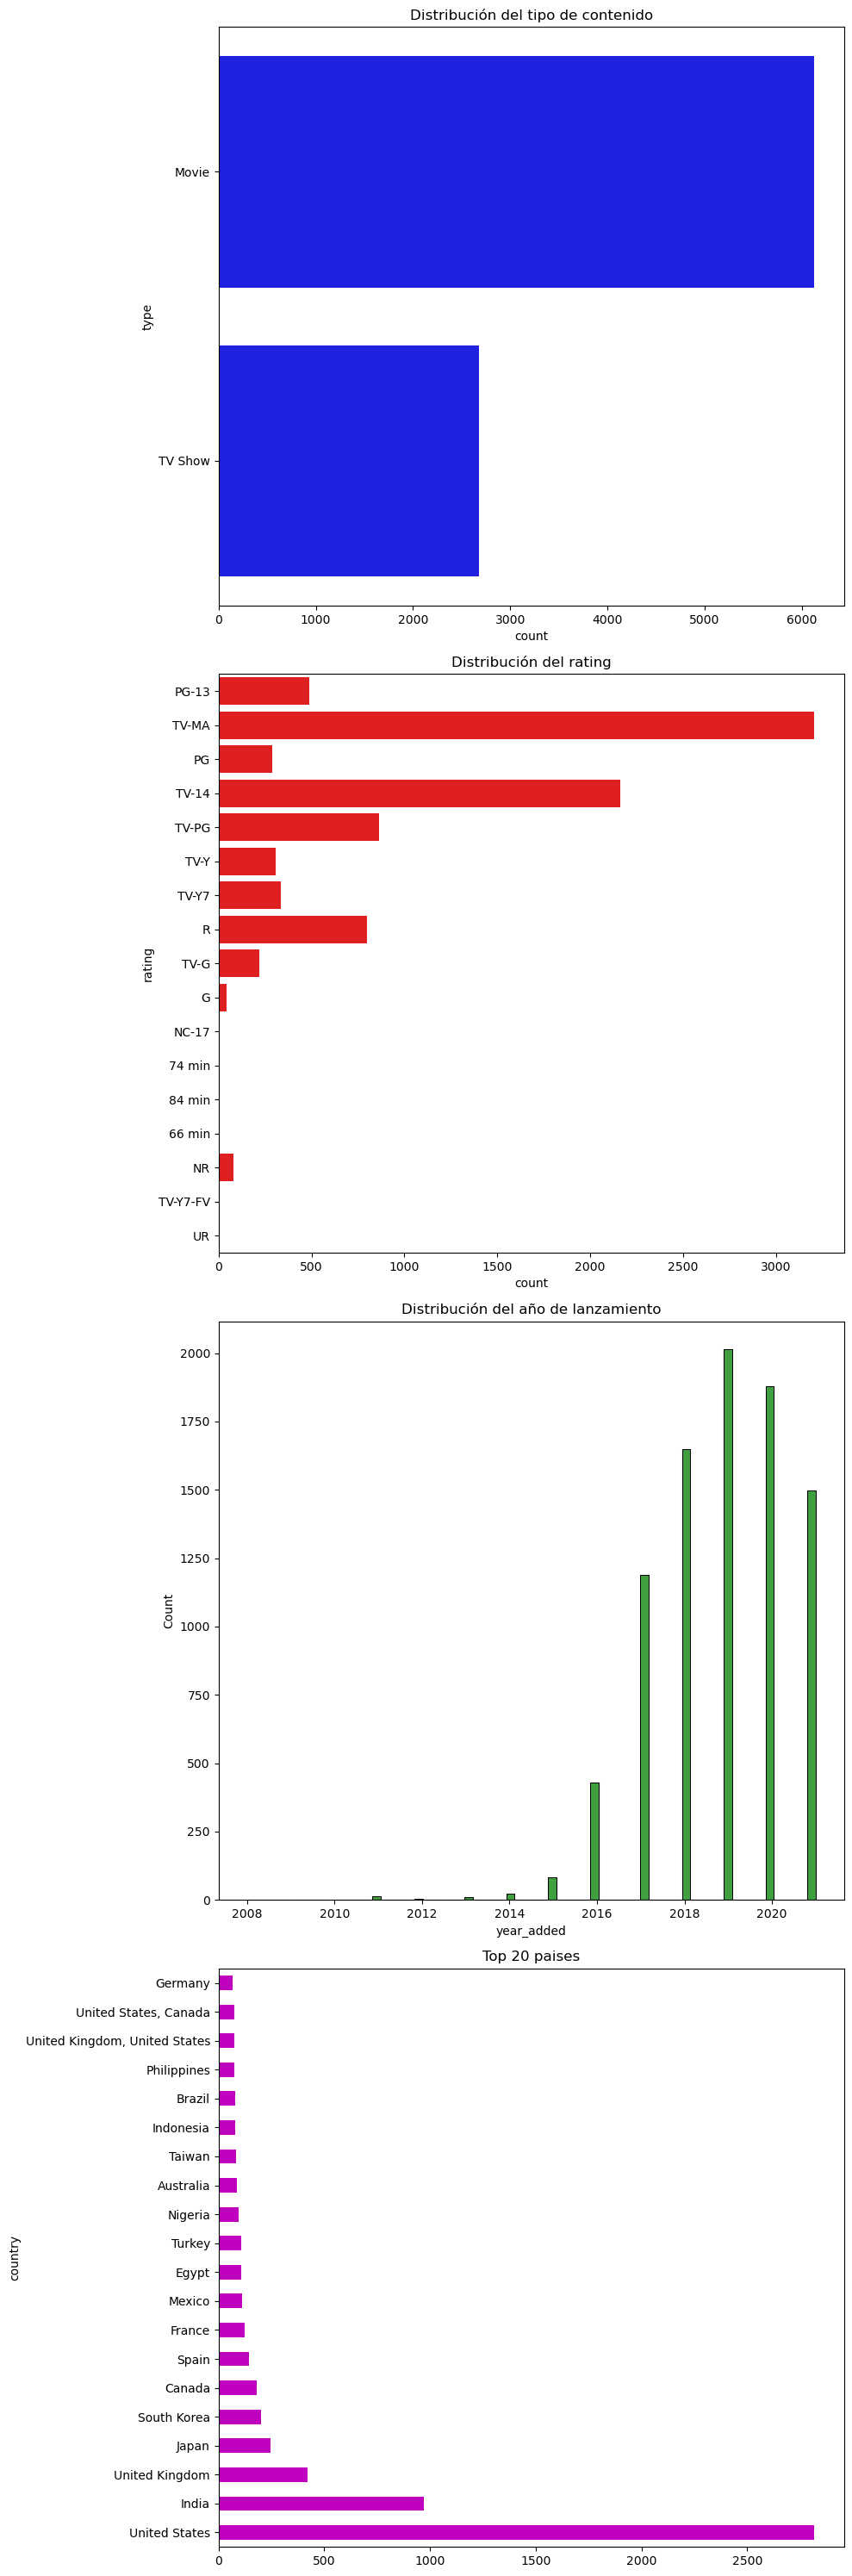

In [29]:
# Configuración de la figura
f, axes = plt.subplots(4, 1, figsize = (10, 30))

# Crear graficos
sns.countplot(data = new_data, y = 'type', color = "b", ax = axes[0])
sns.countplot(data = new_data, y = 'rating', color = "r", ax = axes[1])
sns.histplot(data = new_data, x = 'year_added', color = "g", ax = axes[2])

new_data['country'].value_counts().head(20).plot(kind = 'barh', ax = axes[3], color = "m")

# Añadir títulos
axes[0].set_title('Distribución del tipo de contenido')
axes[1].set_title('Distribución del rating')
axes[2].set_title('Distribución del año de lanzamiento')
axes[3].set_title('Top 20 paises')

plt.tight_layout()
plt.show()